In [3]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


## Creating x-y positions using a random distribution based on the bounds of the original IceCube coordinates

In [4]:
#used to set the range for random.uniform()
print(np.max(gen2_dom_x_positions))
print(np.min(gen2_dom_x_positions))
print(np.max(gen2_dom_y_positions))
print(np.min(gen2_dom_y_positions))

525.42
-570.9
463.72
-521.08


In [5]:
#using random.uniform()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates
index = 0
rand_x_positions = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-600., 550.)
        rand_x_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_1 = [rand_x_positions[x:x+splitedSize] for x in range(0, len(rand_x_positions), splitedSize)]
#converts list to array
rand_dom_x_positions = np.asarray(rand_dom_x_list_1)

print(len(rand_dom_x_positions))
print(len(rand_dom_x_positions[0]))
#print(rand_dom_x_positions)

21
67


In [6]:
#using random.uniform()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-550., 500.)
        rand_y_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_1 = [rand_y_positions[y:y+splitedSize] for y in range(0, len(rand_y_positions), splitedSize)]
#converts list to array
rand_dom_y_positions = np.asarray(rand_dom_y_list_1)

print(len(rand_dom_y_positions))
print(len(rand_dom_y_positions[0]))
#print(rand_dom_y_positions)


21
67


In [7]:
def uniform_random(low, high, coordinate_array, split):
    index = 0
    rand_uniform_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.uniform(low, high)
            rand_uniform_positions.insert(index, dom_num)
            index = index + 1 
    rand_dom_list = [rand_uniform_positions[x:x+split] for x in range(0, len(rand_uniform_positions), split)]
    rand_uni_dom_positions = np.asarray(rand_dom_list)
    return rand_uni_dom_positions

In [23]:
rand_dom_x_positions2 = uniform_random(-600., 550, gen2_dom_x_positions, 67)
print(rand_dom_x_positions2)
print(len(rand_dom_x_positions2))
print(len(rand_dom_x_positions2[0]))

[[-179.82421464 -160.53601478  -92.0142021  ... -136.69891061
  -578.80046896  491.63174503]
 [ 470.83514332 -231.52987857 -147.21861515 ...   92.03536682
  -501.88831856 -302.70635987]
 [-523.145816   -249.26454991 -471.5587232  ... -455.51709491
  -177.48306125  468.25524165]
 ...
 [ -43.96047504 -269.68044797   73.59924026 ...  249.79815265
  -578.792213    137.94130181]
 [ 467.46243726 -548.70333651 -237.35911704 ... -260.8247561
   -67.24769252 -403.48975913]
 [-135.84468443  185.4649485   461.58825445 ...  -62.43761331
  -477.21076091 -440.38858765]]
21
67


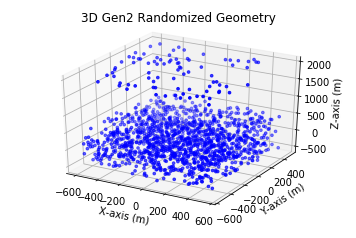

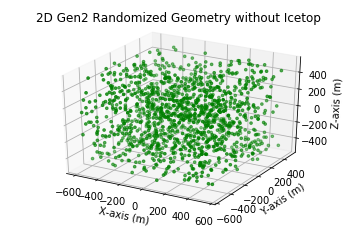

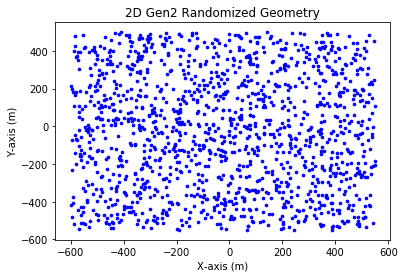

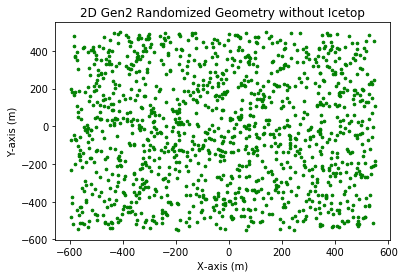

In [24]:
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('X-axis (m)')
ax1.set_ylabel('Y-axis (m)')
ax1.set_zlabel('Z-axis (m)')
ax1.set_title("3D Gen2 Randomized Geometry")
ax1.dist = 11
ax1.scatter3D(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax2 = plt.axes(projection='3d')
ax2.set_xlabel('X-axis (m)')
ax2.set_ylabel('Y-axis (m)')
ax2.set_zlabel('Z-axis (m)')
ax2.set_title("2D Gen2 Randomized Geometry without Icetop")
ax2.dist = 11
ax2.scatter3D(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61], gen2_dom_z_positions[:,0:61], s= 7,c='green', depthshade=True)
plt.show()

ax3 = plt.axes()
ax3.set_xlabel('X-axis (m)')
ax3.set_ylabel('Y-axis (m)')
ax3.set_title("2D Gen2 Randomized Geometry")
ax3.scatter(rand_dom_x_positions, rand_dom_y_positions, s=7, c='blue')
plt.show()

#gen2 positions without icetop
ax4 = plt.axes()
ax4.set_xlabel('X-axis (m)')
ax4.set_ylabel('Y-axis (m)')
ax4.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax4.scatter(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61],s=7, c='green')
plt.show()

## Creating x-y positions using a triangular distribution based on the upper and lower bounds of the original IceCube coordinates 

In [25]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_2 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_x_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_2 = [rand_x_positions_2[x:x+splitedSize] for x in range(0, len(rand_x_positions_2), splitedSize)]
#converts list to array
rand_dom_x_positions_2 = np.asarray(rand_dom_x_list_2)

print(len(rand_dom_x_positions_2))
print(len(rand_dom_x_positions_2[0]))
#print(rand_dom_x_positions)

21
67


In [26]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_y_positions_2 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_y_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_2 = [rand_y_positions_2[x:x+splitedSize] for x in range(0, len(rand_y_positions_2), splitedSize)]
#converts list to array
rand_dom_y_positions_2 = np.asarray(rand_dom_y_list_2)

print(len(rand_dom_y_positions_2))
print(len(rand_dom_y_positions_2[0]))
#print(rand_dom_y_positions)

21
67


In [20]:
def triangular_random(low, high, coordinate_array, split):
    index = 0
    rand_triangular_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.triangular(low, high)
            rand_triangular_positions.insert(index, dom_num)
            index = index + 1 
    rand_dom_list = [rand_triangular_positions[x:x+split] for x in range(0, len(rand_triangular_positions), split)]
    rand_trian_dom_positions = np.asarray(rand_dom_list)
    return rand_trian_dom_positions

In [27]:
rand_dom_x_positions3 = triangular_random(-600., 550, gen2_dom_x_positions, 67)
print(rand_dom_x_positions3)
print(len(rand_dom_x_positions3))
print(len(rand_dom_x_positions3[0]))

[[-281.32735747 -304.53868309  379.23009045 ... -128.23520789
  -335.29680826   93.46070842]
 [ 445.86622987 -156.62946236  277.29524823 ... -214.8515246
   -87.06678835   10.30060843]
 [  82.0500273  -267.40701027  -91.82449226 ...  104.23201086
   -37.73948056  166.89148936]
 ...
 [ 296.12194972  312.76366524  319.75320048 ...  217.68942508
   369.21684694 -332.42725888]
 [  63.80550822  -84.21713462  454.19027949 ... -155.86733924
   -96.0276677    99.51079894]
 [-334.95938442  248.91007364  -28.84394019 ...  -30.72954242
  -444.80483672 -528.39216145]]
21
67


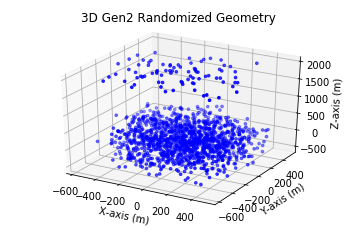

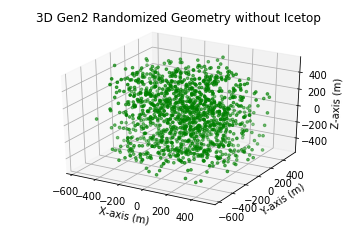

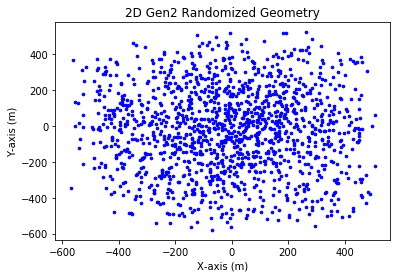

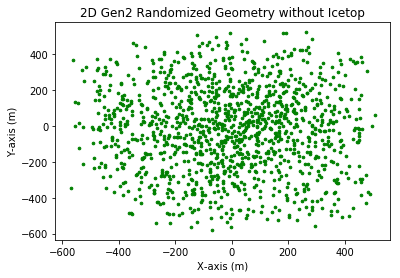

In [29]:
#using random.triangular()

ax5 = plt.axes(projection='3d')
ax5.set_xlabel('X-axis (m)')
ax5.set_ylabel('Y-axis (m)')
ax5.set_zlabel('Z-axis (m)')
ax5.set_title("3D Gen2 Randomized Geometry")
ax5.dist = 11
ax5.scatter3D(rand_dom_x_positions_2, rand_dom_y_positions_2, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax6 = plt.axes(projection='3d')
ax6.set_xlabel('X-axis (m)')
ax6.set_ylabel('Y-axis (m)')
ax6.set_zlabel('Z-axis (m)')
ax6.set_title("3D Gen2 Randomized Geometry without Icetop")
ax6.dist = 11
ax6.scatter3D(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax6 = plt.axes()
ax6.set_xlabel('X-axis (m)')
ax6.set_ylabel('Y-axis (m)')
ax6.set_title("2D Gen2 Randomized Geometry")
ax6.scatter(rand_dom_x_positions_2, rand_dom_y_positions_2, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax7 = plt.axes()
ax7.set_xlabel('X-axis (m)')
ax7.set_ylabel('Y-axis (m)')
ax7.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax7.scatter(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], s =7, c='green')
plt.show()

## Creating x-y positions using a gaussian distribution based on the average and standard deviation of the original IceCube coordinates excluding Icetop

In [30]:
print(np.std(gen2_dom_x_positions[:,0:61]))
print(np.std(gen2_dom_y_positions[:,0:61]))
print(np.average(gen2_dom_x_positions[:,0:61]))
print(np.average(gen2_dom_y_positions[:,0:61]))

303.7535091613165
292.64916272585197
-28.50023419203746
-15.591569086651022


In [31]:
print(random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61])))
print(random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61])))

-152.1455814622471
135.08046491115766


In [32]:
#using random.gauss()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_3 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))
        rand_x_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_3 = [rand_x_positions_3[x:x+splitedSize] for x in range(0, len(rand_x_positions_3), splitedSize)]
#converts list to array
rand_dom_x_positions_3 = np.asarray(rand_dom_x_list_3)

print(len(rand_dom_x_positions_3))
print(len(rand_dom_x_positions_3[0]))
#print(rand_dom_x_positions_3)

21
67


In [33]:
#using random.gauss()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions_3 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61]))
        rand_y_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_3 = [rand_y_positions_3[y:y+splitedSize] for y in range(0, len(rand_y_positions_3), splitedSize)]
#converts list to array
rand_dom_y_positions_3 = np.asarray(rand_dom_y_list_3)

print(len(rand_dom_y_positions_3))
print(len(rand_dom_y_positions_3[0]))
print(type(rand_dom_y_positions_3))
#print(rand_dom_y_positions_3)

21
67
<class 'numpy.ndarray'>


In [48]:
def gauss_random(coordinate_array, split):
    index = 0
    rand_gauss_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.gauss(np.average(coordinate_array), np.std(coordinate_array))
            rand_gauss_positions.insert(index, dom_num)
            index = index + 1
    np.asarray(rand_gauss_positions)        
    rand_gauss_dom_positions = [rand_gauss_positions[x:x+split] for x in range(0, len(rand_gauss_positions), split)]
    #rand_gauss_dom_positions = rand_dom_list
    #print(type(rand_dom_list))
    print(type(rand_gauss_dom_positions[1]))
    return rand_gauss_dom_positions

In [53]:
rand_dom_x_positions_4 = gauss_random(gen2_dom_x_positions[:,0:61], 67)
print(type(rand_dom_x_positions_4))
#print(rand_dom_x_positions_4)
print(len(rand_dom_x_positions_4[0]))
#np.asarray(rand_dom_x_positions_4)

<class 'list'>
<class 'list'>
67


array([list([-200.55047307990128, -70.1127572804235, -369.55870149800154, -77.95501302969566, -685.7105445692645, -120.06537836609277, -126.08998364548378, -273.0674680601644, 223.55462777772445, 414.5112518897947, 120.01255130759938, -553.7161505103383, 163.169546675141, 133.011817785282, -236.22202951727903, -575.4900191369371, -358.13505048930244, -265.02582092721195, -7.9407802429076995, 148.61352663284043, 235.47911065825014, -469.5161930635047, -121.71913908510714, -553.6033609960845, -299.9295214942158, -295.2167014151054, -70.6313518815389, -347.4349771585817, 141.16912993630567, -95.60537647153984, -610.3183735487864, 278.598975502049, 121.0640881329617, 346.95226765935956, -2.0155627903079107, 153.8656840583073, 770.8614146325068, 642.6928614059543, 171.64901488287848, -14.454341925200302, 90.75774596710457, -114.9879220322347, -48.36111477847013, 5.344677616632588, -34.305494747826835, 865.4517812101817, -510.10748563710894, 492.609228164876, 42.659458419871804, -322.8841778

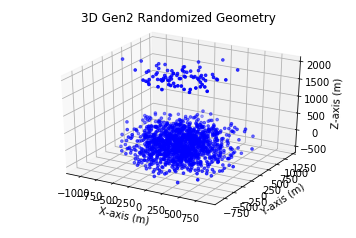

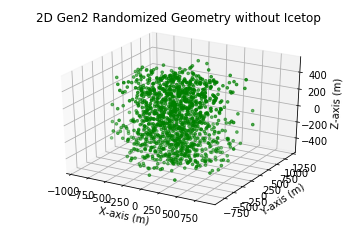

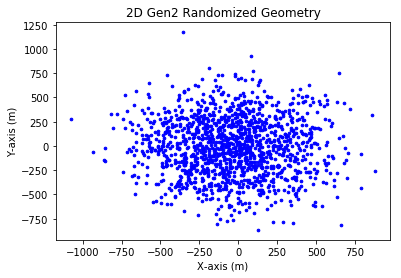

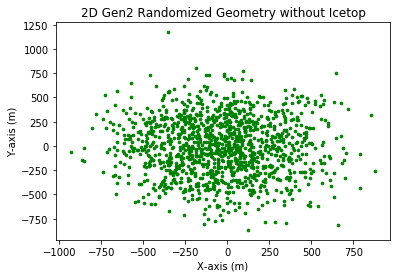

In [39]:
#using random.gauss()

ax8 = plt.axes(projection='3d')
ax8.set_xlabel('X-axis (m)')
ax8.set_ylabel('Y-axis (m)')
ax8.set_zlabel('Z-axis (m)')
ax8.set_title("3D Gen2 Randomized Geometry")
ax8.dist = 11
ax8.scatter3D(rand_dom_x_positions_3, rand_dom_y_positions_3, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax9 = plt.axes(projection='3d')
ax9.set_xlabel('X-axis (m)')
ax9.set_ylabel('Y-axis (m)')
ax9.set_zlabel('Z-axis (m)')
ax9.set_title("2D Gen2 Randomized Geometry without Icetop")
ax9.dist = 11
ax9.scatter3D(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax10 = plt.axes()
ax10.set_xlabel('X-axis (m)')
ax10.set_ylabel('Y-axis (m)')
ax10.set_title("2D Gen2 Randomized Geometry")
ax10.scatter(rand_dom_x_positions_3, rand_dom_y_positions_3, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax11 = plt.axes()
ax11.set_xlabel('X-axis (m)')
ax11.set_ylabel('Y-axis (m)')
ax11.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax11.scatter(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], s =7, c='green')
plt.show()

## Creating x-y positions using a normal distribution based on the average and standard deviation of the original IceCube coordinates excluding Icetop

In [40]:
random.normalvariate(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))

-427.2678429978495

In [41]:
#using random.normalvariate()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_4 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.normalvariate(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))
        rand_x_positions_4.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_4 = [rand_x_positions_4[x:x+splitedSize] for x in range(0, len(rand_x_positions_4), splitedSize)]
#converts list to array
rand_dom_x_positions_4 = np.asarray(rand_dom_x_list_4)

print(len(rand_dom_x_positions_4))
print(len(rand_dom_x_positions_4[0]))
#print(rand_dom_x_positions_4)

21
67


In [42]:
#using random.normalvariate()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions_4 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.normalvariate(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61]))
        rand_y_positions_4.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_4 = [rand_y_positions_4[y:y+splitedSize] for y in range(0, len(rand_y_positions_4), splitedSize)]
#converts list to array
rand_dom_y_positions_4 = np.asarray(rand_dom_y_list_4)

print(len(rand_dom_y_positions_4))
print(len(rand_dom_y_positions_4[0]))
#print(rand_dom_y_positions_4)

21
67


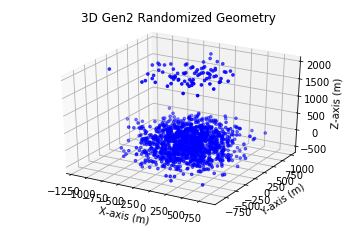

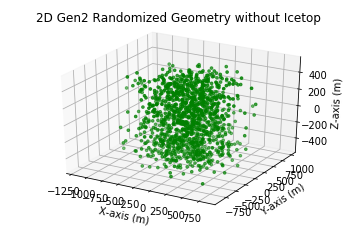

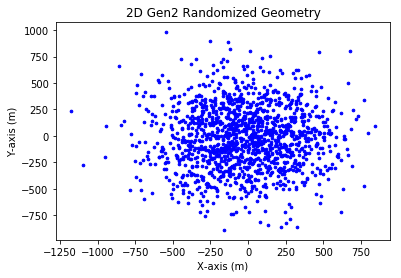

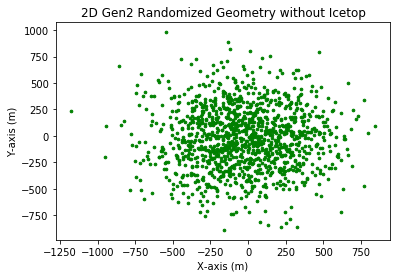

In [43]:
#using random.normalvariate()

ax12 = plt.axes(projection='3d')
ax12.set_xlabel('X-axis (m)')
ax12.set_ylabel('Y-axis (m)')
ax12.set_zlabel('Z-axis (m)')
ax12.set_title("3D Gen2 Randomized Geometry")
ax12.dist = 11
ax12.scatter3D(rand_dom_x_positions_4, rand_dom_y_positions_4, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax13 = plt.axes(projection='3d')
ax13.set_xlabel('X-axis (m)')
ax13.set_ylabel('Y-axis (m)')
ax13.set_zlabel('Z-axis (m)')
ax13.set_title("2D Gen2 Randomized Geometry without Icetop")
ax13.dist = 11
ax13.scatter3D(rand_dom_x_positions_4[:,0:61], rand_dom_y_positions_4[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax14 = plt.axes()
ax14.set_xlabel('X-axis (m)')
ax14.set_ylabel('Y-axis (m)')
ax14.set_title("2D Gen2 Randomized Geometry")
ax14.scatter(rand_dom_x_positions_4, rand_dom_y_positions_4, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax15 = plt.axes()
ax15.set_xlabel('X-axis (m)')
ax15.set_ylabel('Y-axis (m)')
ax15.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax15.scatter(rand_dom_x_positions_4[:,0:61], rand_dom_y_positions_4[:,0:61], s =7, c='green')
plt.show()